In [1]:
from torch import nn, optim, manual_seed, flatten
from Util import apply_conv, apply_pool
import matplotlib.pyplot as plt
from Dataset_Loader import load_leafs_dataset
from Training import train_cnn
from Model_Evaluation import evaluate_model_with_outputs

## Defining CNN Model

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        width = 1633
        height = 1089
        self.pool1, width, height = apply_pool(width, height, kernel_size=2, stride=2)
        self.pool2, width, height = apply_pool(width, height, kernel_size=2, stride=2)
        self.pool3, width, height = apply_pool(width, height, kernel_size=2, stride=2)
    
        self.conv1, width, height = apply_conv(width, height, 1, 8, kernel_size=3, stride=1, padding=1)
        self.pool4, width, height = apply_pool(width, height, kernel_size=2, stride=2)

        self.conv2, width, height = apply_conv(width, height, 8, 16, kernel_size=3, stride=1, padding=1)
        self.pool5, width, height = apply_pool(width, height, kernel_size=2, stride=2)

        self.fc1 = nn.Linear(16*width*height, 1000)
        self.fc2 = nn.Linear(1000, 99)

    def forward(self, x):
        x = self.pool1(x)
        x = self.pool2(x)
        x = self.pool3(x)

        x = nn.functional.relu(self.conv1(x))
        x = self.pool4(x)

        x = nn.functional.relu(self.conv2(x))
        x = self.pool5(x)

        x = flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.log_softmax(self.fc2(x), dim=1)
        return x

## Batch Size 

Reading CSV: 0.025 seconds
Encoding Labels: 0.0 seconds
Resizing Images: 2.97 seconds
Splitting Data: 0.567 seconds
Converting To Tensor: 6.08 seconds
Dividing To Batches: 0.077 seconds
Epoch: 0 / loss: 2.6582958698272705
Epoch: 1 / loss: 0.05191000550985336
Epoch: 2 / loss: 0.3881883919239044
Epoch: 3 / loss: 0.0006249803700484335
Epoch: 4 / loss: 0.00010245144949294627
Epoch: 5 / loss: 5.924315337324515e-05
Epoch: 6 / loss: 3.567135354387574e-05
Epoch: 7 / loss: 2.708902320591733e-05
Epoch: 8 / loss: 2.1725027181673795e-05
Epoch: 9 / loss: 1.79403941729106e-05
Reading CSV: 0.092 seconds
Encoding Labels: 0.004 seconds
Resizing Images: 3.859 seconds
Splitting Data: 0.404 seconds
Converting To Tensor: 4.971 seconds
Dividing To Batches: 0.021 seconds
Epoch: 0 / loss: 1.7223827838897705
Epoch: 1 / loss: 0.18879464268684387
Epoch: 2 / loss: 0.004092186689376831
Epoch: 3 / loss: 0.0009251516312360764
Epoch: 4 / loss: 0.0007457570754922926
Epoch: 5 / loss: 0.00041008074185810983
Epoch: 6 / l

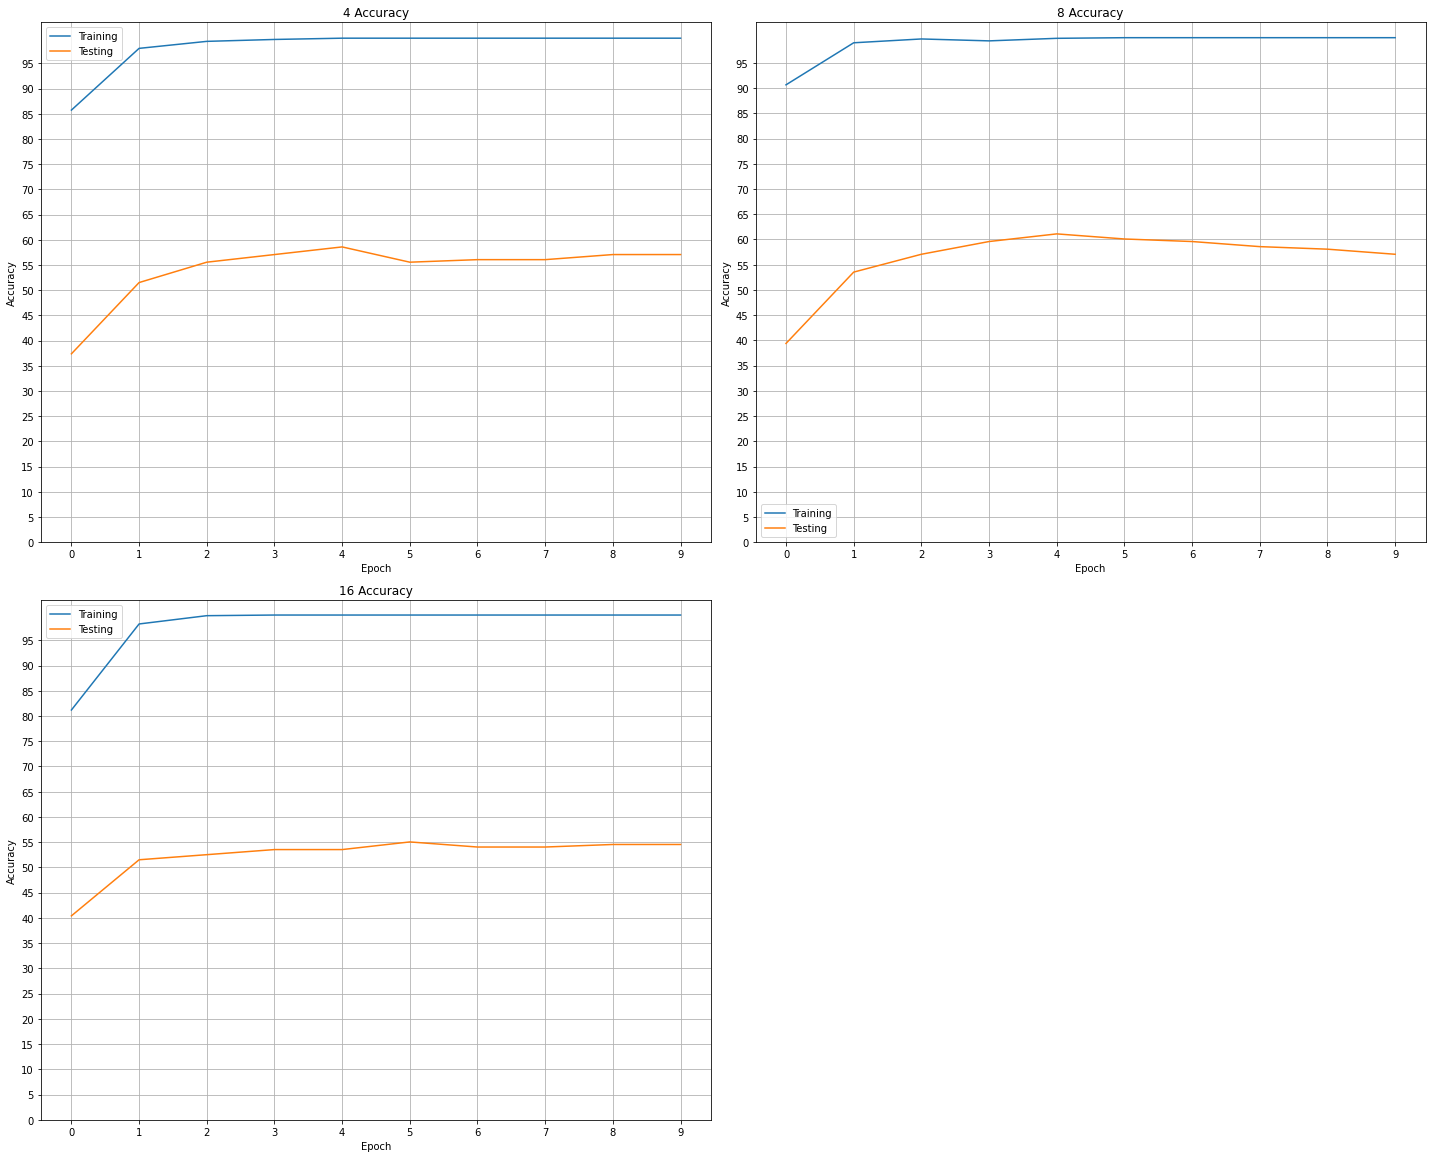

<Figure size 432x288 with 0 Axes>

In [5]:
test_split_size = 0.2
batch_sizes = [4,8,16]
fig = plt.figure(figsize=(20, 16))
for i,batch_size in enumerate(batch_sizes):
    images_train, images_test, labels_train, labels_test = load_leafs_dataset(test_split_size,batch_size)
    manual_seed(1)
    model = CNN()
    epochs = 10
    trained_model, losses_train, accuracies_train, accuracies_test = train_cnn(model= model,
              images_train= images_train,
              labels_train= labels_train,
              images_test= images_test,
              labels_test= labels_test,
              epochs= epochs,
              batch_size= batch_size,
              lossFunction=nn.CrossEntropyLoss(),
              optimizer=optim.Adam(model.parameters(),0.001),
              calc_accuracy=True,
              print_loss = True
             )
    ax = fig.add_subplot(221 + i)
    ax.set_title(f"{batch_size} Accuracy")
    rng_x = range(epochs)
    rng_y = range(0, 100, 5)
    plt.tight_layout()
    plt.plot(rng_x, accuracies_train, label='Training')
    plt.plot(rng_x, accuracies_test, label='Testing')
    plt.xlabel('Epoch')
    plt.xticks(rng_x, rng_x)
    plt.ylabel('Accuracy')
    plt.yticks(rng_y, rng_y)
    plt.grid()
    plt.legend()
    
plt.savefig('batch_size.png')   
plt.show()